## Welcome to the ***wondrous*** world of Sampling Quasar Absorption Spectra! 
### This Notebook will hopefully be a helpful first step into understadning not only how to accomplish this, but also firstly ground your knowledge in the basics of what makes a spectrum!
##### First we need to import some necessary modules

In [23]:
import numpy as np               # very versatile module that we will use frequently
import matplotlib.pyplot as plt  # module we will use for all our plotting!
from rbvfit import model as m    # tool that generates flux data from Dr. Rongmon Bordoloi 

### Now lets make our own spectrum! 
#### Dr. Bordoloi's code requires 3 parameters in order to generate a flux (as well as an assosciated wavelength range). These parameters are: Column Density, Doppler Broadening, and Velocity. 
#### For this set up, lets assume that the light we observe has only passed through one cloud before reaching our detector. This 1 cloud has only 1 set Column Density, Doppler Broadening and Velocity. 
#### Great! But what does that mean? Lets define each parameter.
### Column Density (N)     : Simply defined as the number of molecules over a unit area. So the units are something like cm^(-2). This turns out to be very large so its easiest to work in log space. You will see it appear as logN later!
### Doppler Broadening (b) : Broadening of spectral lines due to the Doppler effect caused by a distribution of velocities of atoms or molecules. So within our cloud, the molecules are moving at their own unique velocities.
### Velocity (v)           : The velocity of the CLOUD. Typically measured in km/s 

# Here's a figure to help understand.
![image.jpg](Fig1.jpg)


### Now lets set up our cloud! Let's assume were looking at a cloud full of Silicon - II

In [30]:
n_clouds = 1
logN = np.array([14.5]) #This depends on what species we are looking at, you'll have to refer to literature for typical values. 
b = np.array([8])
v = np.array([0])

In [31]:
lambda_rest = np.array([1526.7066]) # rest wavelength (in Angstroms) of our Silicon II absorber. Refer to lines/atom_full for a full library of different absorbers and their rest wavelengths. Note, most if not all have multiple!
wave = np.arange(1524,1528,0.01) #creates our wavelength range and with increments of 0.01 Angstroms

### Now we have everything we need except the flux. In order to do this we need to define a couple things so we can feed it into Dr. Bordoloi's code!

In [32]:
params = np.concatenate((logN,b,v)) #this just puts all our parameters into a single array, print in order to see!
print(params)

[14.5  8.   0. ]


In [33]:
zabs=np.array([0.0]) # redshift of our cloud. Assume to be 0 for time being
ntransition=len(lambda_rest) # how many transitions we want to create absorption dips at. This is equal to how many rest wavelengths we defined. len() is just the number of elements in an array, right now it should be 1
print (len(lambda_rest))

1


In [34]:
s= m.create_voigt(zabs,lambda_rest,n_clouds,ntransition,FWHM = '6.5',verbose=True) #creates voigt profiles at each absorber. Right now its just at 1526 Angstroms.

Added line:SiII 1526 at z:0.0


In [35]:
flux = s.model_flux(params,wave) #uses those voigt profiles to generate our normalized flux data! The length of the data is equal to the length of our wavelength array we fed into it.

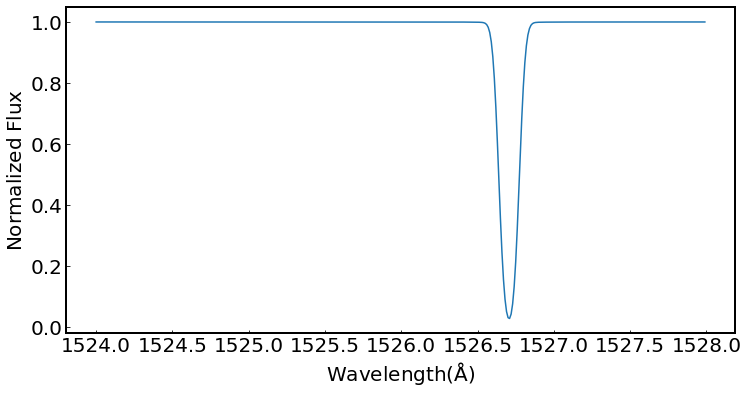

In [21]:
# Lets see it!
fig, ax = plt.subplots(figsize=(12, 6))
    
ax.plot(wave,flux,label='Mock Spectrum')
ax.set_ylabel(r'$\mathrm{Normalized\;Flux}$')
ax.set_xlabel(r'$\mathrm{Wavelength (\AA)}$')
ax.xaxis.set_tick_params(direction='in')
ax.yaxis.set_tick_params(direction='in')
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(20)    

### Hooray! It worked hopefully! You should see a pretty narrow dip right at 1526.7066 Ang. However this probably doesn't look like any absorption spectrum youve seen so lets add some noise.

In [22]:
flux_w_noise = flux + np.random.normal(0,0.06,len(wave))

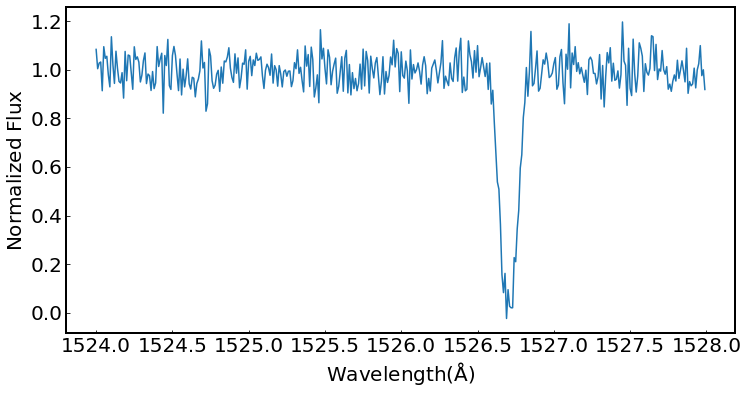

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))
    
ax.plot(wave,flux_w_noise,label='Mock Spectrum')
ax.set_ylabel(r'$\mathrm{Normalized\;Flux}$')
ax.set_xlabel(r'$\mathrm{Wavelength (\AA)}$')
ax.xaxis.set_tick_params(direction='in')
ax.yaxis.set_tick_params(direction='in')
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(20)   

### Ahh much more realistic!
### Now lets see how having different paramters would effect our spectrum
#### LogN will mostly set the amplitude (depth) of our absorption
#### Doppler b will effect the width of our absorption
#### Velocity will effect the offset from the rest wavelength (move it left or right)

## LogN

In [11]:
#Smaller LogN
smaller_logN = np.array([13.5]) #This depends on what species we are looking at, you'll have to refer to literature for typical values. 
params_smallN = np.concatenate((smaller_logN,b,v)) #keep other 2 params the same
flux2 = s.model_flux(params_smallN,wave) + np.random.normal(0,0.06,len(wave))

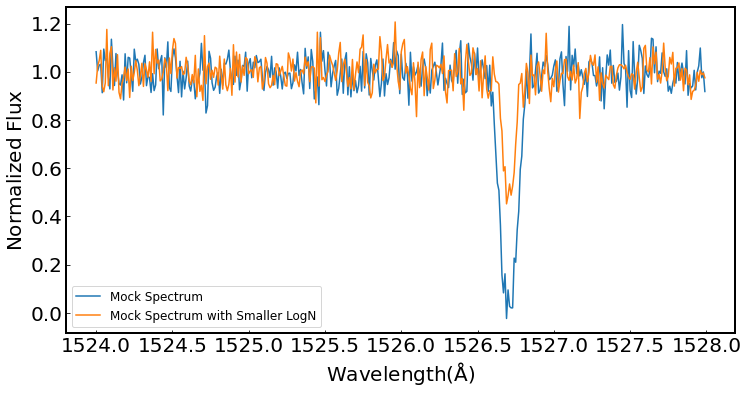

In [12]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(wave,flux_w_noise,label='Mock Spectrum')
ax.plot(wave,flux2,label='Mock Spectrum with Smaller LogN')
ax.set_ylabel(r'$\mathrm{Normalized\;Flux}$')
ax.set_xlabel(r'$\mathrm{Wavelength (\AA)}$')
ax.xaxis.set_tick_params(direction='in')
ax.yaxis.set_tick_params(direction='in')

ax.legend(fontsize=12)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(20) 

## Notice the smaller dip! Now lets look at Doppler b

In [13]:
b_larger = np.array([20.])
params_bigb = np.concatenate((logN,b_larger,v))
flux3 = s.model_flux(params_bigb,wave) + np.random.normal(0,0.06,len(wave))

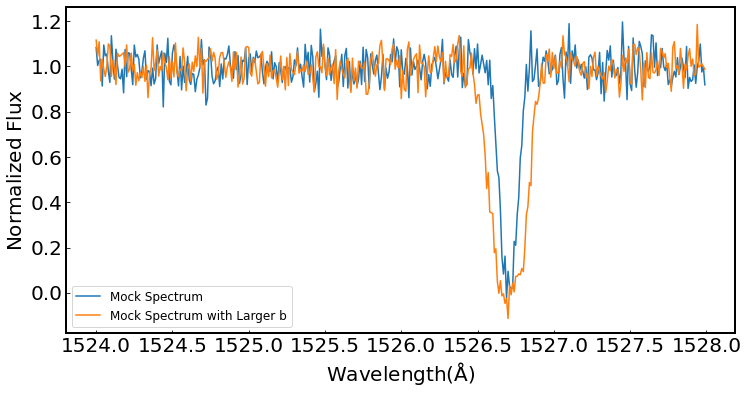

In [14]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(wave,flux_w_noise,label='Mock Spectrum')
ax.plot(wave,flux3,label='Mock Spectrum with Larger b')
ax.set_ylabel(r'$\mathrm{Normalized\;Flux}$')
ax.set_xlabel(r'$\mathrm{Wavelength (\AA)}$')
ax.xaxis.set_tick_params(direction='in')
ax.yaxis.set_tick_params(direction='in')

ax.legend(fontsize=12)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(20) 

## Dip is back to original depth but now much wider! Finally Velocity

In [15]:
negative_v = np.array([-200.])
positive_v = np.array([100.])

params_negv = np.concatenate((logN,b,negative_v))
flux4 = s.model_flux(params_negv,wave) + np.random.normal(0,0.06,len(wave))

params_posv = np.concatenate((logN,b,positive_v))
flux5 = s.model_flux(params_posv,wave) + np.random.normal(0,0.06,len(wave))

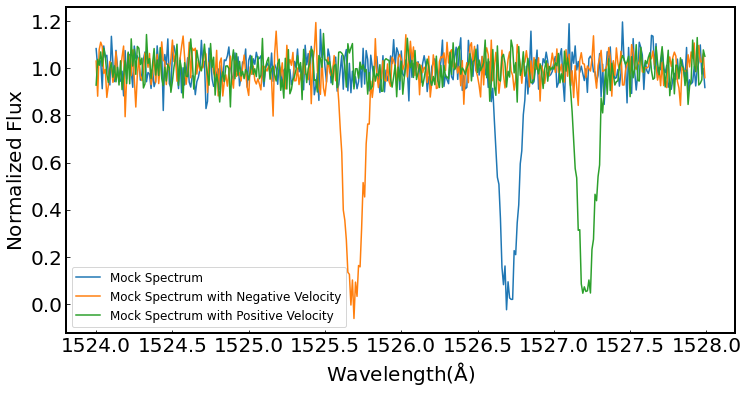

In [16]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(wave,flux_w_noise,label='Mock Spectrum')
ax.plot(wave,flux4,label='Mock Spectrum with Negative Velocity')
ax.plot(wave,flux5,label='Mock Spectrum with Positive Velocity')
ax.set_ylabel(r'$\mathrm{Normalized\;Flux}$')
ax.set_xlabel(r'$\mathrm{Wavelength (\AA)}$')
ax.xaxis.set_tick_params(direction='in')
ax.yaxis.set_tick_params(direction='in')

ax.legend(fontsize=12)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(20) 

### Now that you have an understanding of how the parameters effect the spectrum you'll have an easier time understanding if something went wrong for your sampling. For example : if you sample an absorption dip and the sample produces a fit that is not as deep as the original spectrum - you'll know that something is off with the estimated logN etc...

# Sampling!

### Now lets try sampling this flux data and see if we can recover a good estimate on our parameters of LogN, b , and v. We will use the sampler ***dynesty*** for reasons that will be clearer later on. 

In [86]:
import dynesty #may need to pip install 

### dynesty reuires a prior transform function and a log-likelihood function 
#### The prior transform will essentialy set bounds on the random guesses dynesty makes. Dynesty will prodcue a random number between 0 and 1 for each parameter and its our job to transform the bound from (0,1) to whatever we think necessary
#### The log-likelihood is a little more complicated and was looked up online!

In [94]:
def prior_transform(utheta): #utheta will be the array of random numbers. The length of this array will be equal to n_clouds * number of parameters (3 params for now)
   
    ulogN = utheta[0:n_clouds] #breaks up the array into individual arrays for each parameters so we can transform them differently!
    ub = utheta[n_clouds:2*n_clouds]
    uv = utheta[2*n_clouds:3*n_clouds]

    logN_guess = 3. * ulogN  + 12.  # transforms bounds of logN from (0,1) to (12,15)
    b_guess =  20.* ub + 5.         # transforms bounds of b from (0,1) to (5,15)
    v_guess = 200.* uv - 100.      # transforms bounds of b from (0,1) to (-100,100)

    

    return np.concatenate([logN_guess, b_guess, v_guess])  #returns the array of guess parameters!

In [95]:
def lnlikelihood(theta): #this theta is just the array returned from the prior_transform
    model = s.model_flux(theta,wave) #creates the flux based off our guess parameters 
    inv_sigma2 = 1.0/(enorm**2 )
    all_c2_values = (fnorm - model) ** 2 * inv_sigma2  - np.log(inv_sigma2) #checks how well our guess flux compares to the orignial and assigns it a "score"
    return -0.5 * (np.sum( all_c2_values  )) 

In [96]:
enorm = 0.02 * np.ones((len(wave))) #normalized error, since were using fake flux, we can make it whatever we want!
fnorm = flux_w_noise # renaming our orignial flux file with added noise.

### Now we have everything we need to sample! Let's set up our sampler and let it run!

In [97]:
n_clouds_guess = 1 #we know it should be 1 cloud but lets assume we don't
number_params = 3 # logN, b, v
ndim = number_params * n_clouds #sets how many random numbers dynesty will make
s= m.create_voigt(zabs,lambda_rest,n_clouds_guess,ntransition,FWHM = '6.5',verbose=True) #need to redfine this BEFORE SAMPLING!

### This sampling may take a looooong time as we get more and more intricate spectra (like a week long) so we will eventually move outside of Jupyter Notebooks to sample, but for now this should be managable

In [98]:
dsampler1 = dynesty.DynamicNestedSampler(lnlikelihood, prior_transform, ndim=number_params*n_clouds, bound='multi', sample='auto')
dsampler1.run_nested()

25758it [03:45, 113.98it/s, batch: 11 | bound: 90 | nc: 5 | ncall: 86853 | eff(%): 29.657 | loglstar: -374.427 < -368.000 < -368.469 | logz: -382.148 +/-  0.224 | stop:  0.893]          


##### This took 3 mins : 45 seconds when I ran it 

In [102]:
dres1 = dsampler1.results #our full library of results

In [103]:
dres1

         niter: 25758
         ncall: array([ 1,  1,  1, ...,  1,  1, 10])
           eff: 29.65700666643639
       samples: array([[ 14.98169097,  22.70348054, -60.62269105],
       [ 14.89715522,  21.56226068, -59.96380664],
       [ 14.86634665,  19.41519835,  59.0062671 ],
       ...,
       [ 14.88000341,   6.79430244,   0.2693915 ],
       [ 14.87990504,   6.79735291,   0.26881826],
       [ 14.8753482 ,   6.80900695,   0.26618751]])
    samples_id: array([ 395,  417,  352, ...,  202,  254, 3494])
 samples_batch: array([0, 0, 0, ..., 0, 0, 6])
    samples_it: array([    0,     0,     0, ...,  8588,  9319, 12162])
     samples_u: array([[0.99389699, 0.88517403, 0.19688654],
       [0.96571841, 0.82811303, 0.20018097],
       [0.95544888, 0.72075992, 0.79503134],
       ...,
       [0.96000114, 0.08971512, 0.50134696],
       [0.95996835, 0.08986765, 0.50134409],
       [0.9584494 , 0.09045035, 0.50133094]])
     samples_n: array([500, 500, 500, ...,   3,   2,   1])
         logwt:

In [104]:
#we dont need all of that so lets just pick out the interesting bits!
samples1 = dres1.samples  # all of the samples generated
evidence1 = dres1.logz # bayesian evidnence that will become more interesting later

### Now we can plot corner plots to see how well the samples "converged" to an answer.

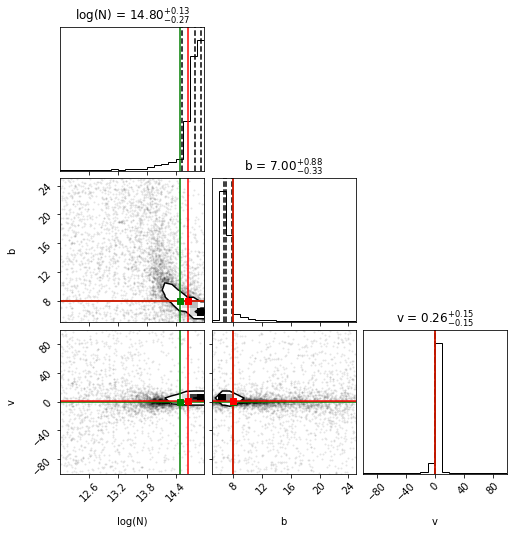

In [107]:
import corner

value1 = params #plot the true values

# This is the empirical mean of the sample:
value2 = np.mean(samples1, axis=0)

# Make the base corner plot
figure = corner.corner(samples1, labels=['log(N)','b','v'],
                       quantiles=[0.16, 0.5, 0.84],
                       show_titles=True, title_kwargs={"fontsize": 12})

# Extract the axes
axes = np.array(figure.axes).reshape((ndim, ndim))

# Loop over the diagonal
for i in range(ndim):
    ax = axes[i, i]
    ax.axvline(value1[i], color="g")
    ax.axvline(value2[i], color="r")
for yi in range(ndim):
    for xi in range(yi):
        ax = axes[yi, xi]
        ax.axvline(value1[xi], color="g")
        ax.axvline(value2[xi], color="r")
        ax.axhline(value1[yi], color="g")
        ax.axhline(value2[yi], color="r")
        ax.plot(value1[xi], value1[yi], "sg")
        ax.plot(value2[xi], value2[yi], "sr")

### In order to produce our fit, we do not need all the samples as the early samples were most likely blind guesses and therefore not very useful. Lets take the mean of the last 100 samples and use that to produce our fit!

In [108]:
guess = np.mean(samples1[-100:],axis=0)

In [109]:
guess_flux = s.model_flux(guess,wave) # creates our fit

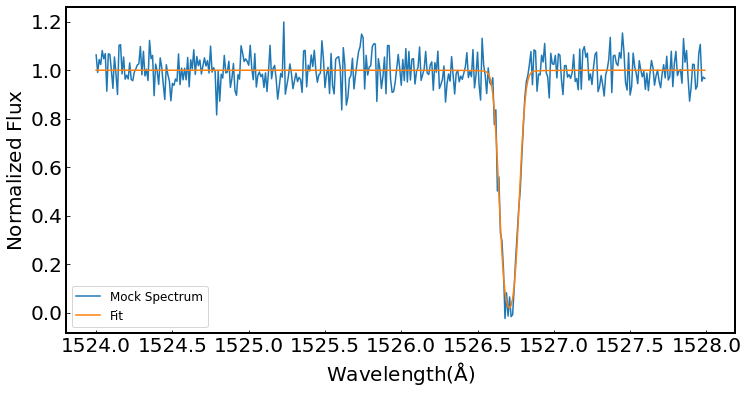

In [111]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(wave,fnorm,label='Mock Spectrum')
ax.plot(wave,guess_flux,label='Fit')

ax.set_ylabel(r'$\mathrm{Normalized\;Flux}$')
ax.set_xlabel(r'$\mathrm{Wavelength (\AA)}$')
ax.xaxis.set_tick_params(direction='in')
ax.yaxis.set_tick_params(direction='in')
ax.legend(fontsize = 12)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(20)   

## WOW! Hopefully our fit is perfectly overlaid with the absorption dip